In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [2]:
# Load the data
customer_interactions = pd.read_csv("data/customer_interactions.csv")
purchase_history = pd.read_csv("data/purchase_history.csv")
product_details = pd.read_csv("data/product_details.csv")

In [3]:
# Look at the first few rows
print(customer_interactions.head())
print(purchase_history.head())
print(product_details.head())

   customer_id  page_views  time_spent_on_website
0      16854.0        53.0                   36.0
1      32777.0        63.0                   43.0
2      71839.0        79.0                    NaN
3      16432.0        57.0                    2.0
4       4182.0        23.0                   55.0
   customer_id  product_id purchase_date
0      16854.0     20921.0    2024-01-06
1      32777.0     96721.0    2023-09-14
2      71839.0     87468.0    2023-07-23
3      16432.0     91865.0    2023-11-15
4       4182.0     99656.0    2023-09-27
   product_id  category   price  ratings
0     20921.0       NaN   50.00      4.9
1     96721.0     books  124.14      1.2
2     87468.0  clothing  123.45      1.4
3     91865.0    sports   74.97      2.4
4     99656.0  clothing   61.53      2.4


In [4]:
# Check the shape of the data
print(customer_interactions.shape)
print(purchase_history.shape)
print(product_details.shape)

(1000, 3)
(1000, 3)
(1000, 4)


In [5]:
# Summarize the statistics of the data
print(customer_interactions.describe())
print(purchase_history.describe())
print(product_details.describe())

        customer_id  page_views  time_spent_on_website
count    952.000000  941.000000             939.000000
mean   52912.613445   49.997875              30.750799
std    28711.298138   29.121791              17.646363
min       21.000000    1.000000               1.000000
25%    28339.500000   23.000000              15.000000
50%    54274.500000   52.000000              30.000000
75%    78176.000000   75.000000              47.000000
max    99964.000000  100.000000              60.000000
        customer_id    product_id
count    952.000000    947.000000
mean   52912.613445  52684.160507
std    28711.298138  28941.315853
min       21.000000    168.000000
25%    28339.500000  28875.000000
50%    54274.500000  54262.000000
75%    78176.000000  77181.000000
max    99964.000000  99837.000000
         product_id        price     ratings
count    947.000000   951.000000  938.000000
mean   52684.160507   178.106257    2.963539
std    28941.315853   326.719313    1.188882
min      168.000000

In [6]:
# Check the data types of the columns
print(customer_interactions.dtypes)
print(purchase_history.dtypes)
print(product_details.dtypes)

customer_id              float64
page_views               float64
time_spent_on_website    float64
dtype: object
customer_id      float64
product_id       float64
purchase_date     object
dtype: object
product_id    float64
category       object
price         float64
ratings       float64
dtype: object


In [7]:
# Check for missing values
print(customer_interactions.isnull().sum())
print(purchase_history.isnull().sum())
print(product_details.isnull().sum())

customer_id              48
page_views               59
time_spent_on_website    61
dtype: int64
customer_id      48
product_id       53
purchase_date    47
dtype: int64
product_id    53
category      48
price         49
ratings       62
dtype: int64


In [8]:
# Merge customer_interactions and purchase_history on 'customer_id'
merged_df = pd.merge(customer_interactions, purchase_history, on="customer_id")

# Merge the result with product_details on 'product_id'
merged_df = pd.merge(merged_df, product_details, on="product_id")
merged_df.head()

,customer_id,page_views,time_spent_on_website,product_id,purchase_date,category,price,ratings
0,16854.0,53.0,36.0,20921.0,2024-01-06,NaN,50.00,4.9
1,32777.0,63.0,43.0,96721.0,2023-09-14,books,124.14,1.2
2,71839.0,79.0,NaN,87468.0,2023-07-23,clothing,123.45,1.4
3,16432.0,57.0,2.0,91865.0,2023-11-15,sports,74.97,2.4
4,4182.0,23.0,55.0,99656.0,2023-09-27,clothing,61.53,2.4


## Handling Missing Values

For `customer_id` and `product_id`, which are unique identifiers, we can't replace missing values with anything meaningful, so we drop these rows.

In [9]:
# Drop rows with missing customer_id and product_id
merged_df.dropna(subset=["customer_id", "product_id"], inplace=True)

For `page_views`, `time_spent_on_website`, `price` and `ratings` (which are continuous variables) we replace missing values with the mean value of the non-missing entries.

In [10]:
# Replace missing values with the mean
merged_df["page_views"].fillna(merged_df["page_views"].mean(), inplace=True)
merged_df["time_spent_on_website"].fillna(
    merged_df["time_spent_on_website"].mean(), inplace=True
)
merged_df["price"].fillna(merged_df["price"].mean(), inplace=True)
merged_df["ratings"].fillna(merged_df["ratings"].mean(), inplace=True)

For `purchase_date`, we can't replace missing values with anything meaningful, so we drop these rows.

In [11]:
# Drop rows with missing purchase_date
merged_df.dropna(subset=["purchase_date"], inplace=True)

For `category`, which is a categorical variable, we replace missing values with the most frequent category (mode).

In [12]:
# Replace missing values with the most frequent category
merged_df["category"].fillna(merged_df["category"].mode()[0], inplace=True)

In [13]:
merged_df.head()

,customer_id,page_views,time_spent_on_website,product_id,purchase_date,category,price,ratings
0,16854.0,53.0,36.000000,20921.0,2024-01-06,sports,50.00,4.9
1,32777.0,63.0,43.000000,96721.0,2023-09-14,books,124.14,1.2
2,71839.0,79.0,30.688757,87468.0,2023-07-23,clothing,123.45,1.4
3,16432.0,57.0,2.000000,91865.0,2023-11-15,sports,74.97,2.4
4,4182.0,23.0,55.000000,99656.0,2023-09-27,clothing,61.53,2.4


## Handling Outliers

we're capping values at the 95th percentile for `page_views`, `time_spent_on_website`, and `price`. This means that any value above the 95th percentile is set to the value at the 95th percentile.

In [14]:
merged_df["page_views"] = merged_df["page_views"].clip(
    upper=merged_df["page_views"].quantile(0.95)
)
merged_df["time_spent_on_website"] = merged_df["time_spent_on_website"].clip(
    upper=merged_df["time_spent_on_website"].quantile(0.95)
)
merged_df["price"] = merged_df["price"].clip(upper=merged_df["price"].quantile(0.95))

# Exploratory Data Analysis

Histogram of `ratings`: This will show us the distribution of product ratings

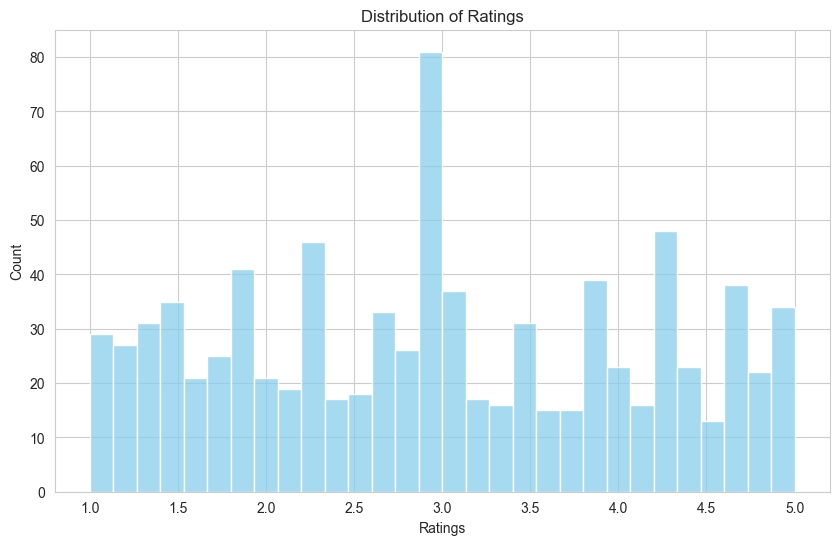

In [15]:
# Set the style of the plots
sns.set_style("whitegrid")

# Histogram of 'ratings'
plt.figure(figsize=(10, 6))
sns.histplot(merged_df["ratings"], bins=30, kde=False, color="skyblue")
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

Bar plot of `category`: This will show us the number of products in each category.

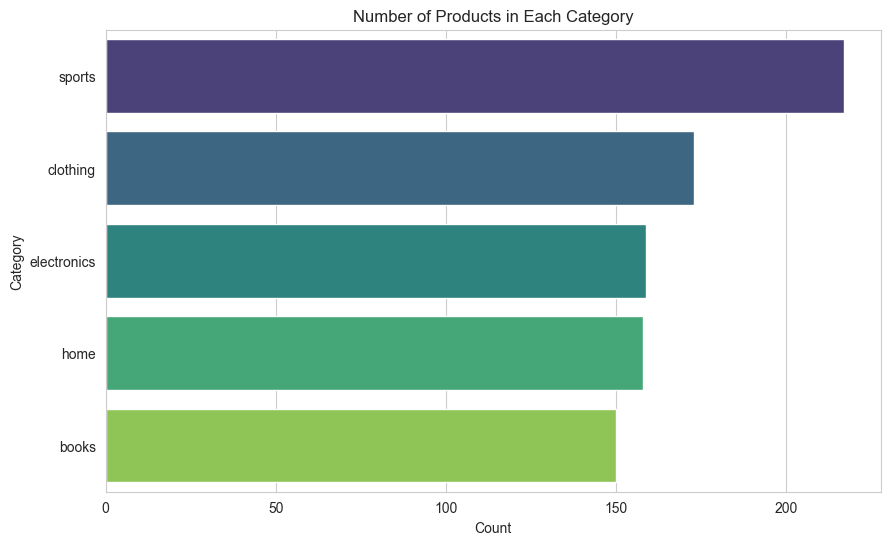

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y="category",
    data=merged_df,
    palette="viridis",
    order=merged_df["category"].value_counts().index,
)
plt.title("Number of Products in Each Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

Scatter plot of `price` vs `ratings`: This will show us if there's a relationship between the price of a product and its average rating.

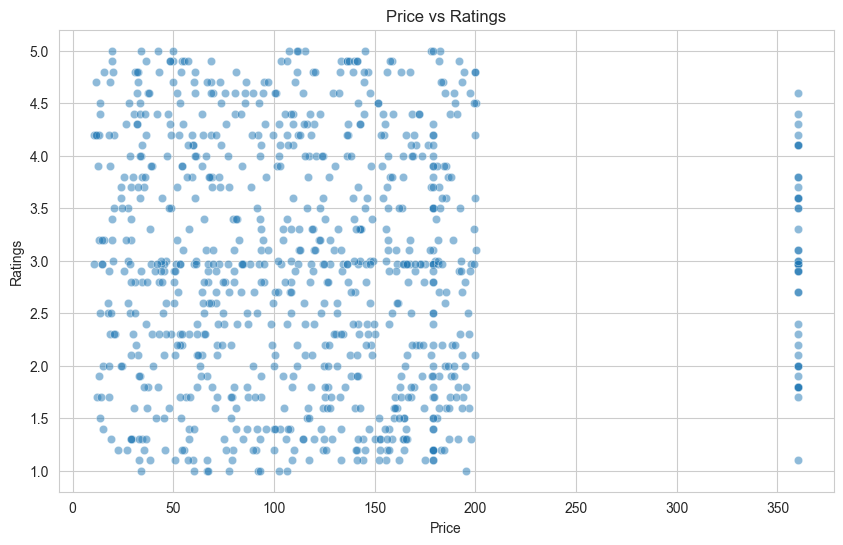

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="ratings", data=merged_df, alpha=0.5)
plt.title("Price vs Ratings")
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.show()

Heatmap of correlations: This will show us the correlation between the numerical variables.

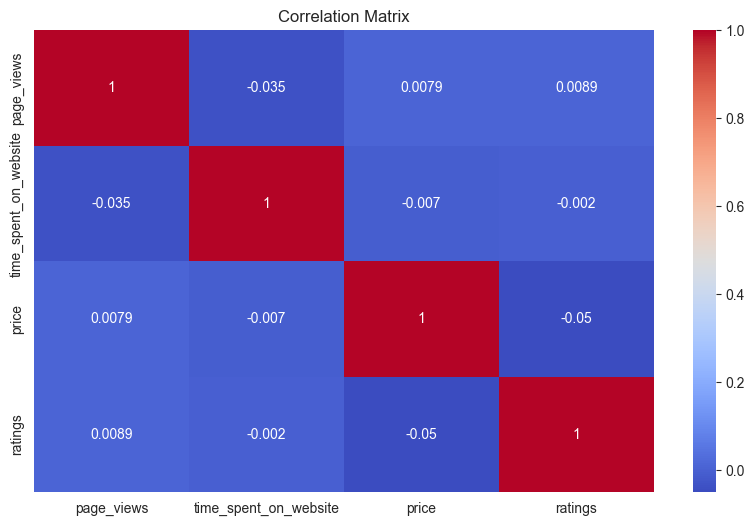

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    merged_df[["page_views", "time_spent_on_website", "price", "ratings"]].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlation Matrix")
plt.show()

# Model training

We're using the `SVD` algorithm, which is a matrix factorization technique that is usually better than other collaborative filtering algorithms at dealing with sparsity. We're using cross-validation to evaluate the model's performance, with RMSE and MAE as our evaluation metrics. We will also be utilizing a hybrid approach using a `DecisionTreeRegressor` that will utilize other potentially useful features that exists in our data.

## Collaborative Filtering

In [19]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

Load the data into a format that surprise can use

In [20]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_df[["customer_id", "product_id", "ratings"]], reader)

Split the data into training and test sets

In [21]:
trainset, testset = train_test_split(data, test_size=0.2)

Train the SVD model

In [28]:
model_cf = SVD()
model_cf.fit(trainset)

## Hybrid Approach with Content-Based model

Convert the `category` column to numerical values

In [23]:
le = LabelEncoder()
merged_df["category"] = le.fit_transform(merged_df["category"])

Train the decision tree model

In [24]:
X = merged_df[
    [
        "customer_id",
        "product_id",
        "page_views",
        "time_spent_on_website",
        "price",
        "category",
    ]
]
y = merged_df["ratings"]
model_cb = DecisionTreeRegressor()
model_cb.fit(X, y)

DecisionTreeRegressor()

## Evaluation

Predict the ratings for the test set with the collaborative filtering model, and Calculate the RMSE and MAE

In [29]:
predictions_cf = model_cf.test(testset)

rmse_cf = accuracy.rmse(predictions_cf)
mae_cf = accuracy.mae(predictions_cf)

RMSE: 1.1246
MAE:  0.9588


Predict the ratings for the test set with the hybrid model, and Calculate the RMSE and MAE

In [26]:
testset_with_features = merged_df.loc[
    merged_df["product_id"].isin([x[1] for x in testset])
    & merged_df["customer_id"].isin([x[0] for x in testset]),
    [
        "customer_id",
        "product_id",
        "page_views",
        "time_spent_on_website",
        "price",
        "category",
    ],
]
predictions_hybrid = []
for _, row in testset_with_features.iterrows():
    rating_cf = model_cf.predict(row["customer_id"], row["product_id"]).est
    input_data = pd.DataFrame(
        [
            [
                row["customer_id"],
                row["product_id"],
                row["page_views"],
                row["time_spent_on_website"],
                row["price"],
                row["category"],
            ]
        ],
        columns=[
            "customer_id",
            "product_id",
            "page_views",
            "time_spent_on_website",
            "price",
            "category",
        ],
    )
    rating_cb = model_cb.predict(input_data)[0]
    rating_hybrid = (rating_cf + rating_cb) / 2
    predictions_hybrid.append(rating_hybrid)

rmse_hybrid = np.sqrt(mean_squared_error([x[2] for x in testset], predictions_hybrid))
mae_hybrid = mean_absolute_error([x[2] for x in testset], predictions_hybrid)

In [27]:
print(f"Collaborative Filtering: RMSE = {rmse_cf}, MAE = {mae_cf}")
print(f"Hybrid: RMSE = {rmse_hybrid}, MAE = {mae_hybrid}")

Collaborative Filtering: RMSE = 1.1245846178548444, MAE = 0.9588199627353479
Hybrid: RMSE = 1.253480653049878, MAE = 1.0446970969854408


As seen from the results above the simple Collaborative Filtering model outperformed the Hybrid model. This result is not really surprising considering that the features we provided to the hybrid model were not highly correlated, as seen from the EDA section. After all, our data was randomly generated. With better data and the hybrid approach may outperform the simple collaborative filtering model, and maybe even achieve a lower RMSE and MAE

In [30]:
import joblib

# Save the model to a file
joblib.dump(model_cf, "model_cf.pkl")

['model_cf.pkl']